# Phân Phối Xác Suất (PPXS)

Xác Suất là đại lượng dùng để đo khả năng xảy ra của một sự kiện (event), xác suất có giá trị từ 0 đến 1. Khi làm việc với tập dữ liệu, chúng ta thường có nhu cầu tìm hiểu xem các thuộc tính (trường) dữ liệu có tuân theo quy luật gì hay không, có thể dự đoán được giá trị của thuộc tính đó hay không, giá trị nào xảy ra nhiều, giá trị nào xảy ra ít?... Để trả lời câu hỏi này chúng ta có thể dựa vào hình dạng phân phối của thuộc tính dữ liệu xem nó có hình dạng nào *đặc biệt* hay không? Trong thống kê, các nhà khoa học đã giả định các đặc trưng dữ liệu là các *biến ngẫu nhiên* và tìm hiểu khả năng xuất hiện các giá trị của chúng. Khái niệm **Phân Phối Xác Xuất (PPSX)** thể hiện xác suất xuất hiện của các giá trị của biến ngẫu nhiên. 

Có rất nhiều PPSX được tìm ra, mỗi loại được phân biệt dựa vào tính chất của biến ngẫu nhiên hoặc phép thử. Khi hiểu được tính chất một số loại PPSX rồi, các bạn có thể so sánh xem thuộc tính dữ liệu mà mình đang tìm hiểu có giống với một PPXS nào hay không? 

Trong nội dung của bài viết này chúng ta chỉ khảo sát một số phân phối tiêu biểu.

Trong Thống Kê, có rất nhiều PPXS, mỗi PPXS có hình dáng đồ thị khác nhau dùng để mô hình hóa các đại lượng ngẫu nhiên khác nhau. Trong nội dung này chúng ta sẽ khảo sát một số PPXS như: 

- Phân phối Nhị Thức
- Phân phối Chuẩn

## NỘI DUNG

1. THƯ VIỆN `scipy.stats`
2. HÀM THÔNG DỤNG
3. CÁC PHÂN PHỐI XÁC SUẤT
- Phân Phối Nhị Thức
- Phân Phối Chuẩn
---


## 1.THƯ VIỆN `scipy.stats`

Để sử dụng các phân phối này ta sử dụng thư viện **<scipy.stats>** để nạp phân phối muốn dùng.

STT | Scipy Package | Distribution Name | Tên Phân Phối | Ký hiệu
--- | ------------- | ----------------- | ------------- | -------
1 | binom | Binomial Distribution | Phân Phối Nhị Thức | B(n, p)
2 | poisson | Poisson Distribution | Phân Phối Poisson | $P({\lambda})$
3 | norm | Normal Distribution / Gauss Distribution | Phân Phối Chuẩn | $N({\mu}, {\sigma}^2)$
4 | t | Student Distribution | Phân Phối Student | T
5 | chi2 | Chi Square Distribution | Phân Phối Chi Bình Phương | ${\chi}^2$



Nạp các thư viện

In [3]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

## 2.HÀM THÔNG DỤNG

Function | Function Details | Ý nghĩa
-------- | ---------------- | -------
rvs |  Random Variates | Tạo mẫu ngẫu nhiên từ phân phối
pmf | Probability Mass Function | Hàm độ lớn **f(x)** cho phân phối rời rạc
pdf | Probability Density Function | Hàm mật độ **f(x)** cho phân phối liên tục
cdf | Cumulative Distribution Function | Hàm phân Phối Tích Lũy **F(x)**
ppf | Percent Point Function (Inverse of CDF) | Tìm điểm phân vị
sf | Survival Function (SF = 1-CDF) | Hàm Survival
isf | Inverse of survival function | Hàm ngược của hàm Survival


## 3. CÁC PHÂN PHỐI XÁC SUẤT

### 3.1 Phân Phối Nhị Thức (Binomial)

#### Phát sinh mẫu

<u>*Ví dụ:*</u> Một bài thi trắc nghiệm bao gồm 10 câu, mỗi câu có 4 lựa chọn. Giả sử bạn không học bài và đánh lụi tất cả các câu hỏi. Có thể rằng giả định rằng xác suất lựa chọn các đáp án là như nhau và sự lựa chọn đáp án ở một câu hỏi không bị ảnh hưởng bởi các câu hỏi khác.

Nếu gọi X là biến ngẫu nhiên thể hiện số câu trả lời đúng, thì X sẽ có phân phối nhị thức (**X ~ B(n, p)**. Ta có thể mô phỏng giá trị của X như sau:

In [4]:
# Số câu hỏi và xác suất lựa chọn đáp án đúng ở một câu trả lời
n, p = 10, 0.25

In [5]:
# Phát sinh ngẫu nhiên số câu đúng
binom.rvs(n, p)

5

Nếu lớp học có 10 bạn, thì có thể mô phỏng kết quả kiểm tra của lớp như sau:

In [6]:
bi_sam_10 = binom.rvs(n, p, size=10)
bi_sam_10

array([4, 4, 1, 4, 4, 3, 3, 2, 3, 2])

In [47]:
# Lập bảng phân phối tần số thống kê số lượng câu trả lời đúng.
df = pd.DataFrame(bi_sam_10)
df


,0
0,4
1,4
2,1
3,4
4,4
5,3
6,3
7,2
8,3
9,2


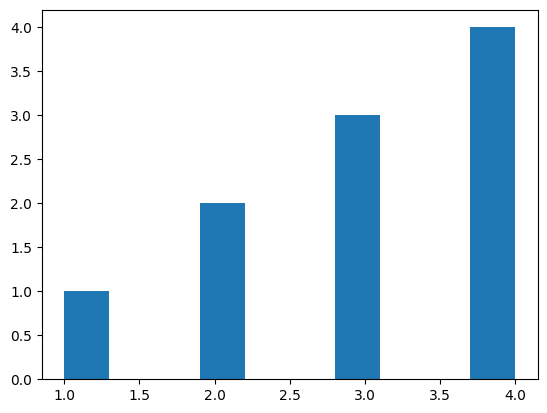

In [8]:
plt.hist(bi_sam_10)
plt.show()

#### Vẽ histogram

In [9]:
# Phát sinh mẫu kích thước 1000 theo phân phối Nhị Thức
bi_sam_1000 = binom.rvs(n, p, size=1000)
freq_table = pd.Series(data=bi_sam_1000, name='Số câu đúng').value_counts().sort_index()
freq_table

Số câu đúng
0     59
1    172
2    287
3    262
4    140
5     57
6     20
7      3
Name: count, dtype: int64

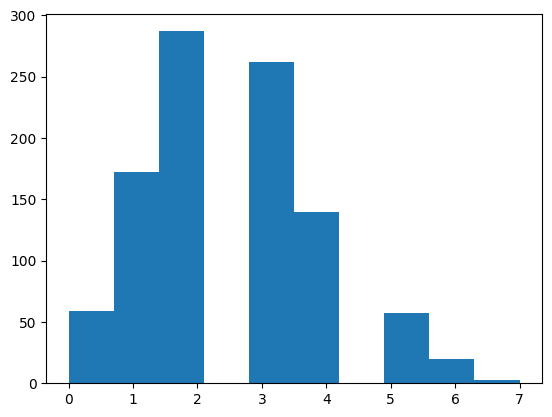

In [10]:
# Vẽ histogram
plt.hist(bi_sam_1000)
plt.show()

<u>**Nhận xét:**</u> Trong đồ thị histogram ở trên, các cột có vị trí không hoàn toàn chính xác. Lý do là vì *matplotlib* tính toán tự động số cột (bins) và vị trí các cột một cách tự động dựa vào giới hạn giá trị trên trục hoành (xlim). Vì vậy, ta thay đổi một số tham số sau để có đồ thị hiển thị tốt hơn:
- `bins=np.arange(11)` chọn 11 cột vì các giá trị số câu đúng từ 0..10
- `dorongcot=0.4` độ rộng cột (mặc định là 0.8 inches)
- `offset=dorongcot/2` dùng để dịch chuyển vị trí của cột ngay giữa điểm dữ liệu (tick)
- Thêm tiêu đề cho đồ thị, trục hoành, trục tung

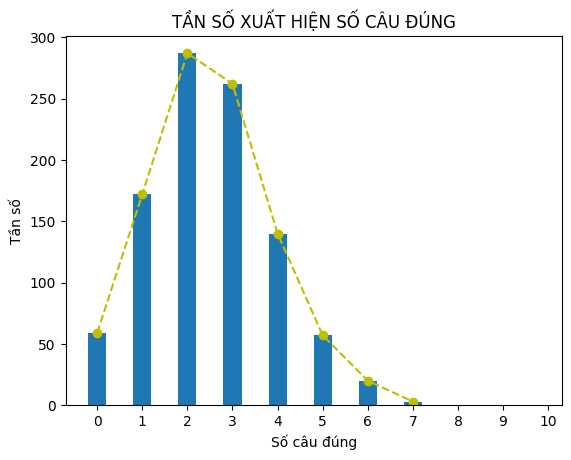

In [11]:
dorongcot = 0.4
offset = dorongcot/2

# Vẽ histogram của bi_sam_1000
plt.hist(bi_sam_1000, bins=np.arange(11)-offset, width=dorongcot)
plt.xticks(range(11))  # hiển thị danh sách các ticks trên trục hoành

# Nối đỉnh các cột lại bằng các đường nét đứt ls='--' (linestyle)
                        #, và nối các điểm đầu mỗi cột marker='o'
plt.plot(freq_table.index, freq_table, color='y', ls='--', marker='o')

plt.xlabel('Số câu đúng')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN SỐ CÂU ĐÚNG')

plt.show()

#### Vẽ hàm độ lớn (pmf)

Vì phân phối nhị thức là phân phối rời rạc nên số lượng các câu đúng cũng mang giá trị rời rạc từ 0..10. Ta sẽ tạo một mảng x mang các giá trị từ 0..10, và một mảng y là giá trị xác suất suất hiện tương ứng với từng giá trị của mảng x theo phân phối nhị thức

In [12]:
x = range(11)
y = binom.pmf(x, n, p)
print('x: ', x)
print('y: ', y)

x:  range(0, 11)
y:  [5.63135147e-02 1.87711716e-01 2.81567574e-01 2.50282288e-01
 1.45998001e-01 5.83992004e-02 1.62220001e-02 3.08990479e-03
 3.86238098e-04 2.86102295e-05 9.53674316e-07]


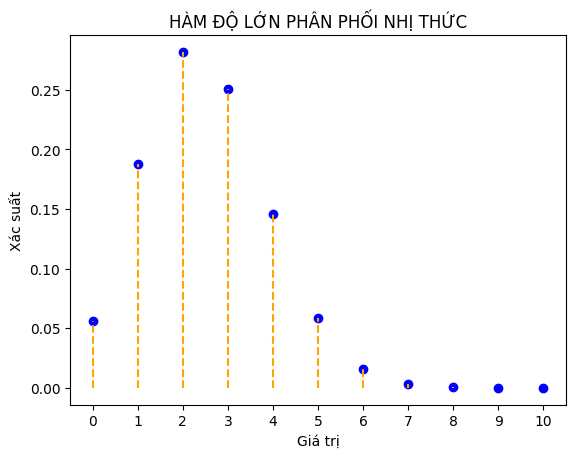

In [13]:
# Vẽ scatter
plt.scatter(x, y, color='b')

# Vẽ các đường đứt nét để dễ nhìn
for value in x:
    plt.plot([value, value], [0, y[value]], color='orange', ls='--')

plt.xticks(x)
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('HÀM ĐỘ LỚN PHÂN PHỐI NHỊ THỨC')

plt.show()

**Bình luận**
- Nếu sử dụng các đường nối các điểm sẽ dễ gây hiểu nhầm là đồ thị cho hàm liên tục, nghĩa là hàm độ lớn sẽ có giá trị tại các điểm mang giá trị không nguyên.
- Đồ thị này có hình dáng giống như đồ thị histogram vẽ từ 1000 phần tử được phát sinh. Trên thực tế, nếu một biến ngẫu nhiên mang phân phối nhị thức thì đồ thị phân phối tần số (histogram) vẽ từ một mẫu thu nhận được sẽ có hình dáng gần giống như đồ thị vẽ từ hàm độ lớn của phân phối này.

#### Vẽ hàm phân phối tích luỹ (cdf)

Hàm phân phối tích luỹ được định nghĩa: **F(x) = P(X $\leq$ x)**

Ta thử vẽ đồ thị hàm phân phối tích luỹ cho hàm phân phối nhị thức và đặt cạnh  đồ thị hàm độ lớn để dễ so sánh.

In [14]:
xs_tich_luy = binom.cdf(x, n, p)
print(xs_tich_luy)

[0.05631351 0.24402523 0.5255928  0.77587509 0.92187309 0.98027229
 0.99649429 0.9995842  0.99997044 0.99999905 1.        ]


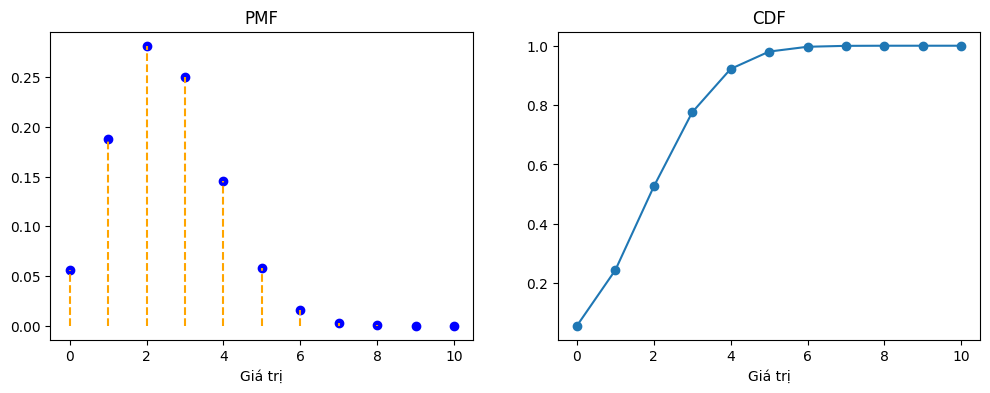

In [15]:
# Vẽ đồ thị có kích thước 12x4 (inches), gồm 2 đồ thị con (axes) nằm cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Vẽ hàm độ lớn (pmf)
axes[0].scatter(x, y, color='b')

for value in x:
    axes[0].plot([value, value], [0, y[value]], color='orange', ls='--')

axes[0].set(xlabel='Giá trị', title='PMF')

# Vẽ hàm phân phối tích luỹ (cdf)
axes[1].plot(x, xs_tich_luy, marker='o') # Thêm marker cho dễ nhìn
axes[1].set(xlabel='Giá trị', title='CDF')

plt.show()

### 3.2 Phân Phối Poisson

Phân phối Poisson thường dùng để tính xác suất của một số sự kiện xảy ra trong một khoảng thời gian. Chúng ta sẽ khởi tạo ngẫu nhiên mẫu có phân phối Poisson và vẽ đồ thị hàm độ lớn của phần phối này.

#### Phát sinh mẫu

In [16]:
# Khởi tạo mẫu có 10000 phần tử có phân phối Poisson
lamda = 1
poi_sam_10K = poisson.rvs(size=10000, mu=lamda)

In [17]:
freq_table = pd.Series(data=poi_sam_10K, name='Số câu đúng').value_counts().sort_index()
freq_table

Số câu đúng
0    3696
1    3698
2    1872
3     559
4     125
5      42
6       7
7       1
Name: count, dtype: int64

#### Vẽ histogram

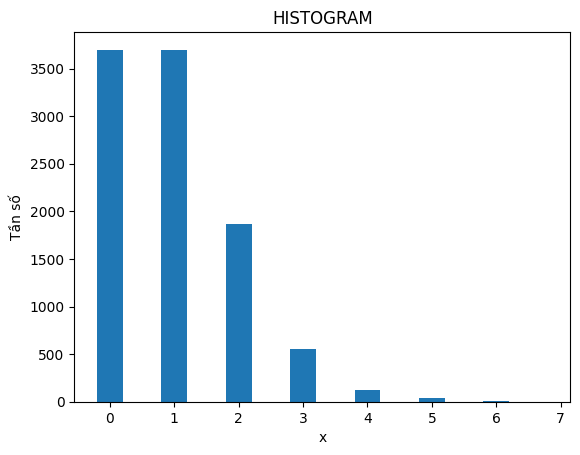

In [18]:
dorongcot=0.4
offset = dorongcot/2  # Dùng để hiển thị ngay dấu ticks

plt.hist(poi_sam_10K-offset, bins=max(freq_table.index), width=dorongcot)

plt.ylabel('Tần số')
plt.xlabel('x')
plt.title('HISTOGRAM')

plt.show()

In [19]:
# Khởi tạo mẫu có 10000 phần tử có phân phối Poisson
lamda = 10
poi_sam_10K_another = poisson.rvs(size=10000, mu=lamda)
freq_table = pd.Series(data=poi_sam_10K_another, name='Số câu đúng').value_counts().sort_index()

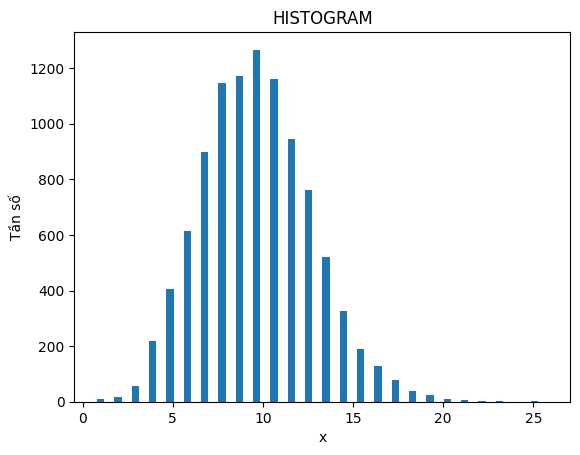

In [20]:
dorongcot=0.4
offset = dorongcot/2  # Dùng để hiển thị ngay dấu ticks

plt.hist(poi_sam_10K_another-offset, bins=max(freq_table.index), width=dorongcot)

plt.ylabel('Tần số')
plt.xlabel('x')
plt.title('HISTOGRAM')

plt.show()

#### Vẽ hàm độ lớn (pmf)

In [21]:
x = range(30)
y = poisson.pmf(x, mu=10)
print('x: ', x)
print('y: ', y)

x:  range(0, 30)
y:  [4.53999298e-05 4.53999298e-04 2.26999649e-03 7.56665496e-03
 1.89166374e-02 3.78332748e-02 6.30554580e-02 9.00792257e-02
 1.12599032e-01 1.25110036e-01 1.25110036e-01 1.13736396e-01
 9.47803301e-02 7.29079462e-02 5.20771044e-02 3.47180696e-02
 2.16987935e-02 1.27639962e-02 7.09110899e-03 3.73216263e-03
 1.86608131e-03 8.88610150e-04 4.03913704e-04 1.75614654e-04
 7.31727725e-05 2.92691090e-05 1.12573496e-05 4.16938875e-06
 1.48906741e-06 5.13471521e-07]


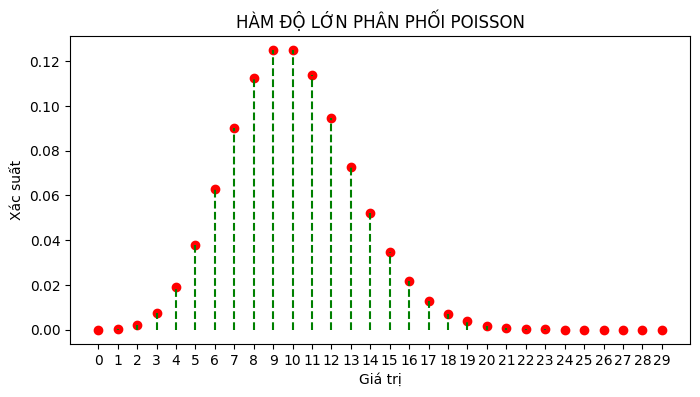

In [22]:
plt.subplots(figsize=(8, 4))

# Vẽ scatter
plt.scatter(x, y, color='red')

# Vẽ các đường đứt nét để dễ nhìn
for value in x:
    plt.plot([value, value], [0, y[value]], color='green', ls='--')

plt.xticks(x)
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('HÀM ĐỘ LỚN PHÂN PHỐI POISSON')

plt.show()

**CÂU HỎI** Bạn có nhận xét gì về đồ thị ở hình trên hay không

#### Vẽ hàm phân phối tích luỹ (cdf)

Thử vẽ hàm phân phối tích luỹ của đồ thị trên (mu=10)

In [23]:
xs_tich_luy = poisson.cdf(x, mu=10)
print(xs_tich_luy)

[4.53999298e-05 4.99399227e-04 2.76939572e-03 1.03360507e-02
 2.92526881e-02 6.70859629e-02 1.30141421e-01 2.20220647e-01
 3.32819679e-01 4.57929714e-01 5.83039750e-01 6.96776146e-01
 7.91556476e-01 8.64464423e-01 9.16541527e-01 9.51259597e-01
 9.72958390e-01 9.85722386e-01 9.92813495e-01 9.96545658e-01
 9.98411739e-01 9.99300349e-01 9.99704263e-01 9.99879878e-01
 9.99953051e-01 9.99982320e-01 9.99993577e-01 9.99997746e-01
 9.99999236e-01 9.99999749e-01]


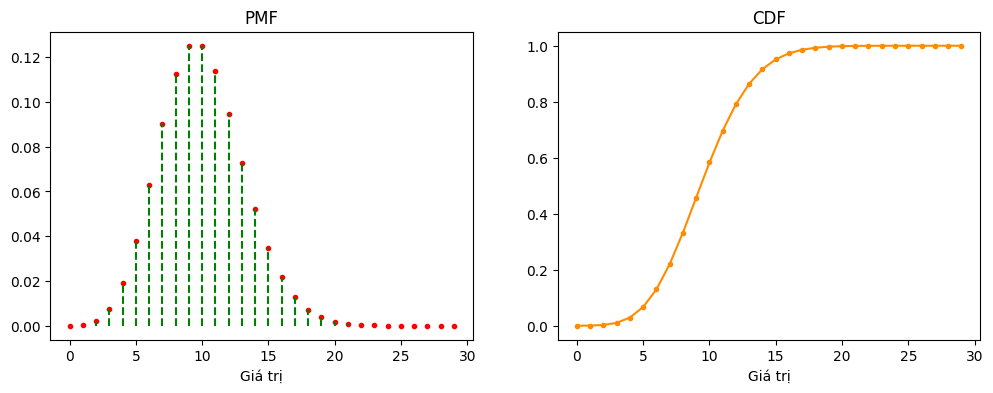

In [24]:
# Vẽ đồ thị có kích thước 12x4 (inches), gồm 2 đồ thị con (axes) nằm cùng một hàng
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Vẽ hàm độ lớn (pmf)
axes[0].scatter(x, y, color='red', marker='.')

for value in x:
    axes[0].plot([value, value], [0, y[value]], color='green', ls='--')

axes[0].set(xlabel='Giá trị', title='PMF')

# Vẽ hàm phân phối tích luỹ (cdf)
axes[1].plot(x, xs_tich_luy, marker='.',color='darkorange') # Thêm marker cho dễ nhìn
axes[1].set(xlabel='Giá trị', title='CDF')

plt.show()

### 3.3 Phân Phối Chuẩn (Normal)

#### Phát sinh mẫu

Giả sử chiều cao của nam thanh niên trưởng thành là biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 170cm, và độ lệch chuẩn là 3cm. Ta thử phát sinh ngẫu nhiên mẫu chiều cao của 10000 thanh niên.

In [25]:
mu = 170
sigma = 3
norm_sam_10K = norm.rvs(loc=mu, scale=sigma, size=10000)

#### Vẽ histogram

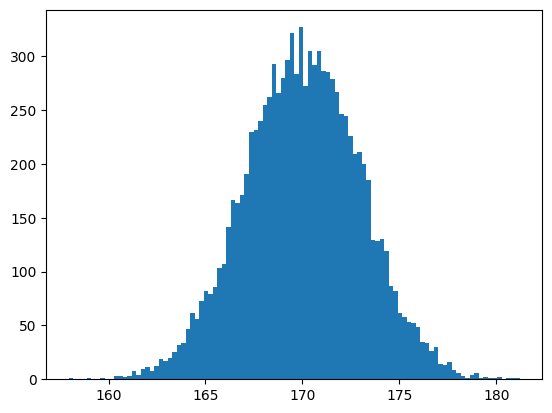

In [26]:
plt.hist(norm_sam_10K, bins=100)

plt.show()

#### Vẽ hàm mật độ (pdf)

Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với các tham số $\mu$ và $\sigma$ khác nhau

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1784\2558108761.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y1, label='$\mu=170, \sigma=3$')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1784\2558108761.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y2, label='$\mu=170, \sigma=5$')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1784\2558108761.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y3, label='$\mu=160, \sigma=3$')


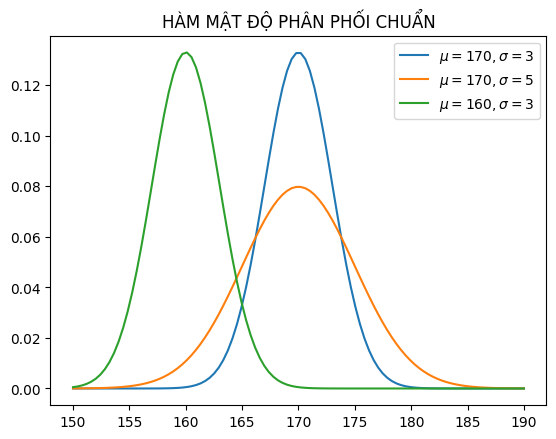

In [27]:
x = np.linspace(150, 190, 100)
y1 = norm.pdf(x, loc=170, scale=3)
y2 = norm.pdf(x, loc=170, scale=5)
y3 = norm.pdf(x, loc=160, scale=3)

plt.plot(x, y1, label='$\mu=170, \sigma=3$')
plt.plot(x, y2, label='$\mu=170, \sigma=5$')
plt.plot(x, y3, label='$\mu=160, \sigma=3$')

plt.title('HÀM MẬT ĐỘ PHÂN PHỐI CHUẨN')
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1784\1824651513.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(xx, yy, color='darkorange', label='$\mu=0, \sigma=1$')


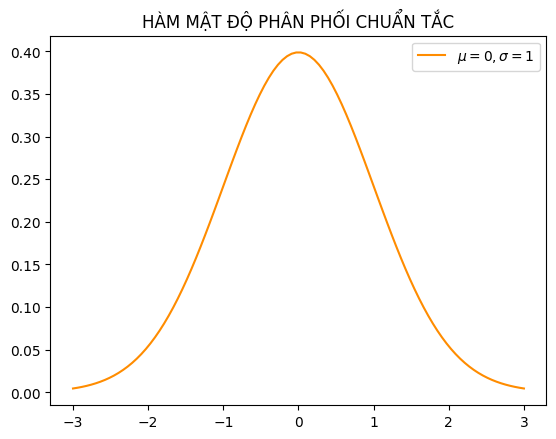

In [28]:
xx = np.linspace(-3, 3, 100)
yy = norm.pdf(xx) # mặc định loc=0, scale=1

plt.plot(xx, yy, color='darkorange', label='$\mu=0, \sigma=1$')
# plt.plot(xx, yy)
plt.title('HÀM MẬT ĐỘ PHÂN PHỐI CHUẨN TẮC')
plt.legend()

plt.show()

In [29]:
norm.pdf(-1)

np.float64(0.24197072451914337)

#### Tính toán trên phân phối chuẩn

Một số hàm thường dùng trên phân phối chuẩn

In [30]:
xs_be_hon_1 = norm.cdf(x= -1, loc = 0, scale= 1)     

xs_lon_hon_1 = 1 - norm.cdf(x= 1, loc = 0, scale= 1) 

xs_giua = 1 - (xs_be_hon_1 + xs_lon_hon_1)

print(xs_be_hon_1, xs_lon_hon_1, xs_giua)

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.3, 0.03, '0.159')

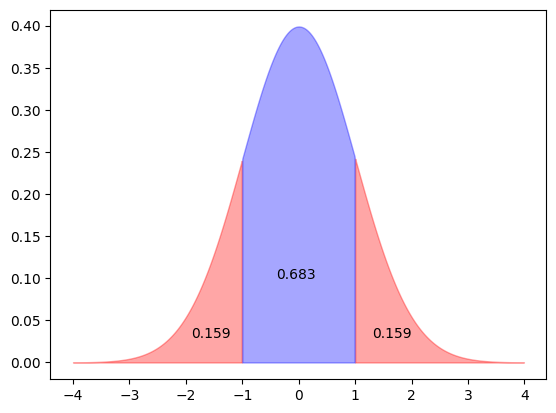

In [31]:
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= norm.pdf(np.arange(-4,-1,0.01)) ,
                 color='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= norm.pdf(np.arange(1,4,0.01)) ,
                 color='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= norm.pdf(np.arange(-1,1,0.01)) ,
                 color='blue',
                 alpha=0.35)

plt.text(x=-1.9, y=0.03, s= round(xs_be_hon_1, 3))
plt.text(x=-0.4, y=0.1, s= round(xs_giua,3))
plt.text(x=1.3, y=0.03, s= round(xs_lon_hon_1, 3))

Hàm **cdf()**

In [32]:
norm.cdf(-2).round(5)

np.float64(0.02275)

In [33]:
norm.cdf(8, loc=16, scale=4).round(5)

np.float64(0.02275)

In [34]:
norm.ppf(0.02275, loc=16, scale=4).round(2)

np.float64(8.0)

Hàm **ppf()**

In [35]:
norm.ppf(0.02275).round(2)

np.float64(-2.0)

Hàm **sf()**

In [36]:
norm.sf(2).round(5)

np.float64(0.02275)

Hàm **isf()**

In [37]:
norm.isf(0.02275).round(2)

np.float64(2.0)

In [38]:
binom.pmf(1, 3, 0.9545)

np.float64(0.005928160874999993)

In [39]:
x_177 = norm.cdf(177, loc=175, scale=4)
x_166 = norm.cdf(166, loc=175, scale=4)

x_177 - x_166

np.float64(0.6792379886189684)

In [40]:
norm.ppf(0.33, loc=175, scale=4)

np.float64(173.24034733730707)

In [41]:
norm.ppf(0.45)

np.float64(-0.12566134685507402)